# SEQ Task Position Heatmap/Bar Plot 

In [1]:
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('muted')

#sids = ['783125', '783126']

sids = ['783125', '783126', '783127', '783128', '783129', '783130', '783131', '783132', '783133', '783134',
        '783135', '783136', '783137', '783138', '783139', '783140', '783141', '783142', '783144', '783146',
        '783147', '783148', '783149', '783150', '783151', '783152', '783153', '783154', '783155', '783156',
        '783157', '783158', '783159', '783163','783143'] #34 subjects

proj_dir = '/home/data/madlab/data/mri/seqtrd' 
mask_filenames = []
cope_files = []
for SID in sids:
    subjmasks = glob(proj_dir + '/mask/cortical_rois/{0}/anat_masks/_subject_id_{0}/*'.format(SID))
    subjmasks.sort()
    mask_filenames.append(subjmasks)
    subjcopes = glob(proj_dir + '/frstlvl/seq_item_pos/*_pos*/' + SID + '/modelfit/contrasts/cope02_*_pos*.nii.gz')
    subjcopes.sort()
    cope_files.append(subjcopes)    
    if len(cope_files[-1]) == 0 or len(cope_files[-1]) != 17:
        print(SID)

## Cell to double-check the array indexing

In [2]:
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(mask_filenames[0]):
    print(i, mask_filenames[0][i].split('/')[-1][:-7])

(0, 'cerebellum_bimask_warped')
(1, 'l_ant_hpc_warped')
(2, 'l_cerebellum_bimask_warped')
(3, 'lh-angular-gyrus_fs_warped')
(4, 'lh-caudate_warped')
(5, 'lh-motor_fs_warped')
(6, 'lh-pcc_fs_warped')
(7, 'lh-precuneus_fs_warped')
(8, 'lh-superiortemporalctx_warped')
(9, 'lh_hpc_warped')
(10, 'lh_mpfc_warped')
(11, 'limbicthal_bin_trans_warped')
(12, 'r_ant_hpc_warped')
(13, 'r_cerebellum_bimask_warped')
(14, 'rh-angular-gyrus_fs_warped')
(15, 'rh-caudate_warped')
(16, 'rh-motor_fs_warped')
(17, 'rh-pcc_fs_warped')
(18, 'rh-precuneus_fs_warped')
(19, 'rh-superiortemporalctx_warped')
(20, 'rh_hpc_warped')
(21, 'rh_mpfc_warped')
(22, 'seq_bold_r01_dtype_despike_roi')
(23, 'x_bihemi_ant_hpc_warped')
(24, 'x_bihemi_mpfc_warped')
(25, 'x_combined_antHC_mPFC_mask')


In [3]:
for i, curr_cope in enumerate(cope_files[0]):
    print(i, cope_files[0][i].split('/')[-1][7:-7]) 

(0, 'inseq_pos2')
(1, 'inseq_pos3')
(2, 'inseq_pos4')
(3, 'inseq_pos5')
(4, 'inseq_pos6')
(5, 'ot_pos2')
(6, 'ot_pos3')
(7, 'ot_pos4')
(8, 'ot_pos5')
(9, 'repeat_pos3')
(10, 'repeat_pos4')
(11, 'repeat_pos5')
(12, 'repeat_pos6')
(13, 'skip_pos2')
(14, 'skip_pos3')
(15, 'skip_pos4')
(16, 'skip_pos5')


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [4]:
inseq = {'subjid':[],
         'hp_pos2':[], 'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[], 'hp_pos6':[],  
         'mpfc_pos2':[], 'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[], 'mpfc_pos6':[]}

ot = {'subjid':[],
      'hp_pos2':[], 'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[],  
      'mpfc_pos2':[], 'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[]}

repeat = {'subjid':[],
          'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[], 'hp_pos6':[], 
          'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[], 'mpfc_pos6':[]}

skip = {'subjid':[],
        'hp_pos2':[],'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[], 
        'mpfc_pos2':[], 'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[]}
           
          
for i in range(len(sids)):
    inseq['subjid'].append(sids[i])
    ot['subjid'].append(sids[i])
    repeat['subjid'].append(sids[i])
    skip['subjid'].append(sids[i])
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][3])
    lh_mpfc_img = nb.load(mask_filenames[i][1])
    rh_mpfc_img = nb.load(mask_filenames[i][4])
    
    inseq_pos2_img = nb.load(cope_files[i][0])
    inseq_pos3_img = nb.load(cope_files[i][1])
    inseq_pos4_img = nb.load(cope_files[i][2])
    inseq_pos5_img = nb.load(cope_files[i][3])
    inseq_pos6_img = nb.load(cope_files[i][4])
    ot_pos2_img = nb.load(cope_files[i][5])
    ot_pos3_img = nb.load(cope_files[i][6])
    ot_pos4_img = nb.load(cope_files[i][7])
    ot_pos5_img = nb.load(cope_files[i][8])
    repeat_pos3_img = nb.load(cope_files[i][9])
    repeat_pos4_img = nb.load(cope_files[i][10])
    repeat_pos5_img = nb.load(cope_files[i][11])
    repeat_pos6_img = nb.load(cope_files[i][12]) 
    skip_pos2_img = nb.load(cope_files[i][13])
    skip_pos3_img = nb.load(cope_files[i][14])
    skip_pos4_img = nb.load(cope_files[i][15])
    skip_pos5_img = nb.load(cope_files[i][16]) 

    pos = ['pos2', 'pos3', 'pos4', 'pos5', 'pos6']
    
    for r in ['hp', 'mpfc']:
        for d in ['inseq', 'ot', 'repeat', 'skip']:      
            if d in ['skip', 'ot']: #if a skip or ot trial
                for p in pos[:-1]: #iterate through pos2-5
                    lh_data = eval('{0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.]'.format(d,p,r))   
                    rh_data = eval('{0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    bihemi_data = np.concatenate((lh_data, rh_data))
                    eval('{0}["{1}_{2}"].append(bihemi_data)'.format(d,r,p))
            elif d == 'repeat':#if a repeat trial
                for p in pos[1:]: #iterate through pos3-6
                    lh_data = eval('{0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    rh_data = eval('{0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    bihemi_data = np.concatenate((lh_data, rh_data))
                    repeat['{0}_{1}'.format(r,p)].append(bihemi_data) 
            else: #if an inseq trial    
                for p in pos: #iterate through pos2-6
                    lh_data = eval('{0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    rh_data = eval('{0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    bihemi_data = np.concatenate((lh_data, rh_data))
                    inseq['{0}_{1}'.format(r,p)].append(bihemi_data)
                    
inseq_df = pd.DataFrame(inseq) 
ot_df = pd.DataFrame(ot) 
repeat_df = pd.DataFrame(repeat) 
skip_df = pd.DataFrame(skip) 

# HIPPOCAMPUS

In [5]:
HPC_raw_diags = {'ots':[], 'skips':[], 'repeats':[]}
HPC_avg_diags = {'ots':[], 'skips':[], 'repeats':[]}

pos = ['2', '3', '4', '5', '6']

for i, sub in enumerate(sids):
    for d in ['inseq', 'ot', 'repeat', 'skip']:      
        if d in ['skip', 'ot']: #if a skip or ot trial
            for j, p in enumerate(pos[:-1]): #iterate through pos2-5
                if j < 3:
                    x = eval('stats.pearsonr({0}_df["hp_pos{1}"][{3}],{0}_df["hp_pos{2}"][{3}])[0]'.format(d,pos[j],pos[j+1],i))
                    eval('HPC_raw_diags["{0}s"].append(x)'.format(d))
        elif d == 'repeat':#if a repeat trial
            for j, p in enumerate(pos[1:]): #iterate through pos3-6
                if j < 3:
                    x = eval('stats.pearsonr(repeat_df["hp_pos{0}"][{2}],repeat_df["hp_pos{1}"][{2}])[0]'.format(pos[j+1],pos[j+2],i))
                    HPC_raw_diags["repeats"].append(x)

for k in range(0,102,3):
    HPC_avg_diags['ots'].append(np.mean(HPC_raw_diags['ots'][k:k+3]))
    HPC_avg_diags['skips'].append(np.mean(HPC_raw_diags['skips'][k:k+3]))
    HPC_avg_diags['repeats'].append(np.mean(HPC_raw_diags['repeats'][k:k+3]))
    
HPC_avg_df = pd.DataFrame(HPC_avg_diags)

In [6]:
HPC_avg_df

,ots,repeats,skips
0,0.162758,-0.042563,0.175080
1,-0.002993,0.135962,0.093111
2,0.307927,0.190162,0.221904
3,0.207198,0.167697,0.428802
4,0.562270,0.128513,0.449594
5,0.078258,-0.002972,0.060316
6,0.221040,0.295147,0.126085
7,0.096210,0.156791,0.170554
8,0.224523,0.120812,0.148677
9,0.300585,0.331897,0.171223


Mean ots: 0.182076216619
STD ots: 0.143044582843
Shapiro's Test of Normality: (0.9784450531005859, 0.7231208086013794)
--------
Mean repeats: 0.156248779673
STD repeats: 0.145049656828
Shapiro's Test of Normality: (0.9827905297279358, 0.8557189106941223)
--------
Mean skips: 0.216055142638
STD skips: 0.123628181422
Shapiro's Test of Normality: (0.9310123324394226, 0.03348147124052048)
--------


/home/data/madlab/envs/hcp_madlab_env/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


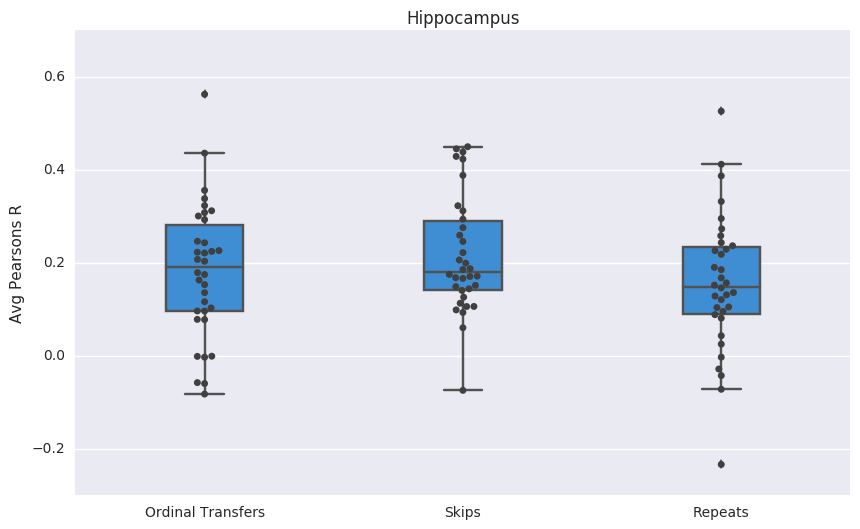

In [7]:
for key in HPC_avg_df:
    print "Mean {0}:".format(key), np.mean(HPC_avg_df['{0}'.format(key)])
    print "STD {0}:".format(key), np.std(HPC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(HPC_avg_df['{0}'.format(key)])
    print "--------"
    
N = 3
conditions = ['Ordinal Transfers', 'Skips', 'Repeats']
hp_allsubjs = [HPC_avg_df['ots'], HPC_avg_df['skips'], HPC_avg_df['repeats']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("Hippocampus")
plt.show()

### Ordinal Transfers

Mean pos4:  0.350263
STD pos4:  0.21981
Shapiro's Test of Normality: (0.9640191197395325, 0.3007599711418152)
--------
Mean pos5:  0.186312
STD pos5:  0.21045
Shapiro's Test of Normality: (0.9539663195610046, 0.14997683465480804)
--------
Mean pos2:  0.199365
STD pos2:  0.197674
Shapiro's Test of Normality: (0.9743937849998474, 0.5744947195053101)
--------
Mean pos3:  0.204001
STD pos3:  0.227689
Shapiro's Test of Normality: (0.948289692401886, 0.10040117800235748)
--------


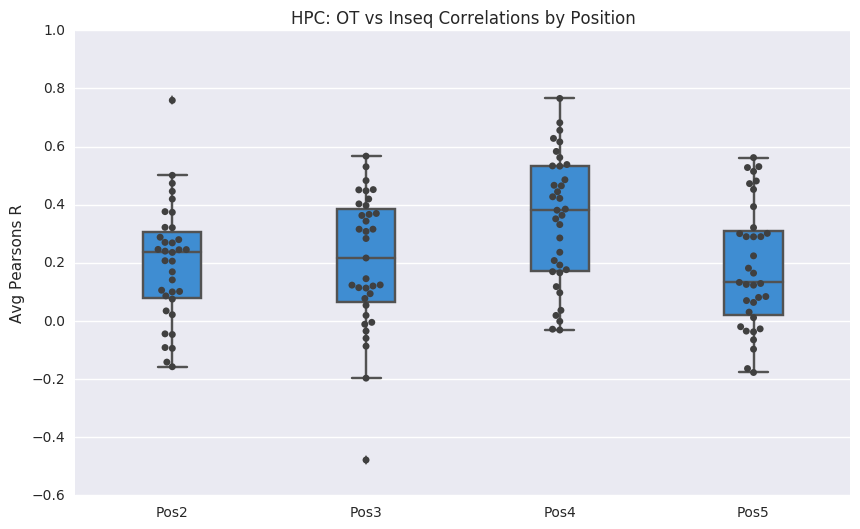

In [8]:
ot_hp_corrs = {'pos2':[], 'pos3':[], 'pos4':[], 'pos5':[]}

for i, sub in enumerate(sids):
    for x in ['2','3','4','5']:
        hp_corr = eval('stats.pearsonr(ot_df["hp_pos{0}"][{1}], inseq_df["hp_pos{0}"][{1}])[0]'.format(x,i))
        ot_hp_corrs["pos{0}".format(x)].append(hp_corr)
ot_hp_corrs_df = pd.DataFrame(ot_hp_corrs)
corr_table = []
for key in ot_hp_corrs:
    print "Mean {0}: ".format(key), np.mean(ot_hp_corrs['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(ot_hp_corrs['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(ot_hp_corrs['{0}'.format(key)])
    print "--------"
N = 4
conditions = ['Pos2', 'Pos3', 'Pos4', 'Pos5']
hp_allsubjs = [ot_hp_corrs['pos2'], ot_hp_corrs['pos3'], 
               ot_hp_corrs['pos4'], ot_hp_corrs['pos5']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("HPC: OT vs Inseq Correlations by Position")
plt.show()

### Skips

Mean pos4:  0.392782
STD pos4:  0.227935
Shapiro's Test of Normality: (0.9734948873519897, 0.546098530292511)
--------
Mean pos5:  0.156097
STD pos5:  0.175893
Shapiro's Test of Normality: (0.971924364566803, 0.49826252460479736)
--------
Mean pos2:  0.252678
STD pos2:  0.160563
Shapiro's Test of Normality: (0.9784457683563232, 0.7079551219940186)
--------
Mean pos3:  0.241501
STD pos3:  0.253167
Shapiro's Test of Normality: (0.964599609375, 0.312680721282959)
--------


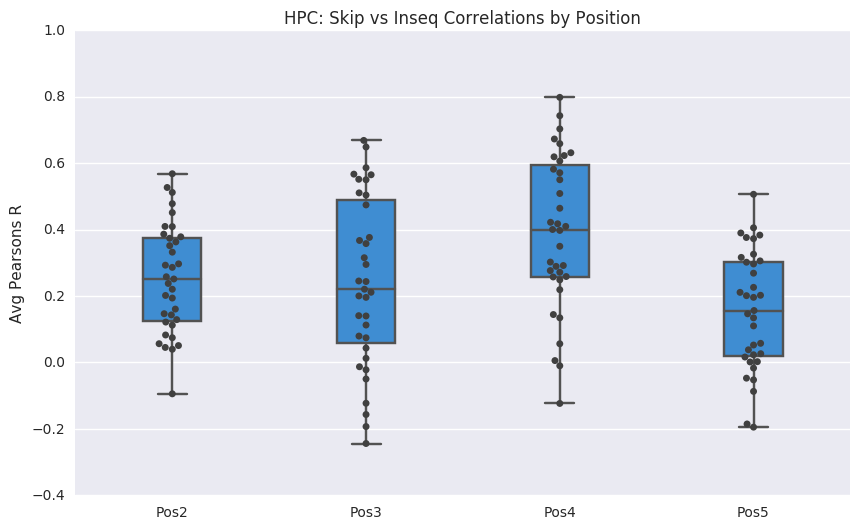

In [9]:
skip_hp_corrs = {'pos2':[], 'pos3':[], 'pos4':[], 'pos5':[]}

for i, sub in enumerate(sids):
    for x in ['2','3','4','5']:
        hp_corr = eval('stats.pearsonr(skip_df["hp_pos{0}"][{1}], inseq_df["hp_pos{0}"][{1}])[0]'.format(x,i))
        skip_hp_corrs["pos{0}".format(x)].append(hp_corr)
skip_hp_corrs_df = pd.DataFrame(skip_hp_corrs)
corr_table = []
for key in skip_hp_corrs:
    print "Mean {0}: ".format(key), np.mean(skip_hp_corrs['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(skip_hp_corrs['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(skip_hp_corrs['{0}'.format(key)])
    print "--------"
N = 4
conditions = ['Pos2', 'Pos3', 'Pos4', 'Pos5']
hp_skip_allsubjs = [skip_hp_corrs['pos2'], skip_hp_corrs['pos3'], 
                    skip_hp_corrs['pos4'], skip_hp_corrs['pos5']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_skip_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_skip_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("HPC: Skip vs Inseq Correlations by Position")
plt.show()

#sns.heatmap(corr_table, annot=True)

### Repeats

Mean pos6:  0.183606
STD pos6:  0.213997
Shapiro's Test of Normality: (0.9770813584327698, 0.6625000238418579)
--------
Mean pos4:  0.344331
STD pos4:  0.212379
Shapiro's Test of Normality: (0.9593653678894043, 0.21883957087993622)
--------
Mean pos5:  0.256613
STD pos5:  0.183295
Shapiro's Test of Normality: (0.9679074883460999, 0.3884013295173645)
--------
Mean pos3:  0.1718
STD pos3:  0.186186
Shapiro's Test of Normality: (0.9583926796913147, 0.20454442501068115)
--------


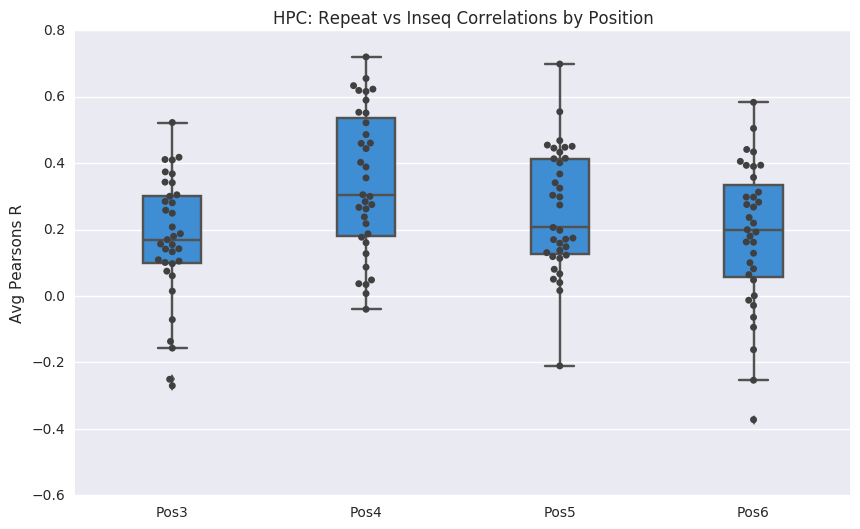

In [10]:
repeat_hp_corrs = {'pos3':[], 'pos4':[], 'pos5':[], 'pos6':[]}

for i, sub in enumerate(sids):
    for x in ['3','4','5','6']:
        hp_corr = eval('stats.pearsonr(repeat_df["hp_pos{0}"][{1}],inseq_df["hp_pos{0}"][{1}])[0]'.format(x,i))
        repeat_hp_corrs["pos{0}".format(x)].append(hp_corr)
repeat_hp_corrs_df = pd.DataFrame(repeat_hp_corrs)
corr_table = []
for key in repeat_hp_corrs:
    print "Mean {0}: ".format(key), np.mean(repeat_hp_corrs['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(repeat_hp_corrs['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(repeat_hp_corrs['{0}'.format(key)])
    print "--------"
N = 4
conditions = ['Pos3', 'Pos4', 'Pos5', 'Pos6']
hp_repeat_allsubjs = [repeat_hp_corrs['pos3'], repeat_hp_corrs['pos4'], 
                      repeat_hp_corrs['pos5'], repeat_hp_corrs['pos6']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_repeat_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_repeat_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("HPC: Repeat vs Inseq Correlations by Position")
plt.show()

# mPFC

In [11]:
mPFC_raw_diags = {'ots':[], 'skips':[], 'repeats':[]}
mPFC_avg_diags = {'ots':[], 'skips':[], 'repeats':[]}

pos = ['2', '3', '4', '5', '6']

for i, sub in enumerate(sids):
    for d in ['inseq', 'ot', 'repeat', 'skip']:      
        if d in ['skip', 'ot']: #if a skip or ot trial
            for j, p in enumerate(pos[:-1]): #iterate through pos2-5
                if j < 3:
                    x = eval('stats.pearsonr({0}_df["mpfc_pos{1}"][{3}],{0}_df["mpfc_pos{2}"][{3}])[0]'.format(d,pos[j],pos[j+1],i))
                    eval('mPFC_raw_diags["{0}s"].append(x)'.format(d))
        elif d == 'repeat':#if a repeat trial
            for j, p in enumerate(pos[1:]): #iterate through pos3-6
                if j < 3:
                    x = eval('stats.pearsonr(repeat_df["mpfc_pos{0}"][{2}],repeat_df["mpfc_pos{1}"][{2}])[0]'.format(pos[j+1],pos[j+2],i))
                    mPFC_raw_diags["repeats"].append(x)

for k in range(0,102,3):
    mPFC_avg_diags['ots'].append(np.mean(mPFC_raw_diags['ots'][k:k+3]))
    mPFC_avg_diags['skips'].append(np.mean(mPFC_raw_diags['skips'][k:k+3]))
    mPFC_avg_diags['repeats'].append(np.mean(mPFC_raw_diags['repeats'][k:k+3]))
    
mPFC_avg_df = pd.DataFrame(mPFC_avg_diags)

In [12]:
mPFC_avg_df

,ots,repeats,skips
0,0.226507,-0.035595,0.134300
1,0.191861,0.200366,0.086458
2,0.122067,0.108113,0.225777
3,0.254463,0.138237,0.169180
4,0.412528,0.060848,0.335032
5,0.083138,0.103227,0.176476
6,0.166643,0.145069,0.208251
7,0.278163,0.207989,0.198079
8,0.183346,0.217214,0.162647
9,0.228825,0.147756,0.085572


In [13]:
print "OTs: ", stats.shapiro(mPFC_avg_df['ots'])
print "Repeats: ", stats.shapiro(mPFC_avg_df['repeats'])
print "Skips: ", stats.shapiro(mPFC_avg_df['skips'])

OTs:  (0.9872783422470093, 0.9545717239379883)
Repeats:  (0.9665879607200623, 0.37403449416160583)
Skips:  (0.96736079454422, 0.39264819025993347)


Mean ots:  0.189884867848
STD ots:  0.111967771712
Shapiro's Test of Normality: (0.9872783422470093, 0.9545717239379883)
--------
Mean repeats:  0.164619533099
STD repeats:  0.122875337839
Shapiro's Test of Normality: (0.9665879607200623, 0.37403449416160583)
--------
Mean skips:  0.172378863865
STD skips:  0.0853370417629
Shapiro's Test of Normality: (0.96736079454422, 0.39264819025993347)
--------


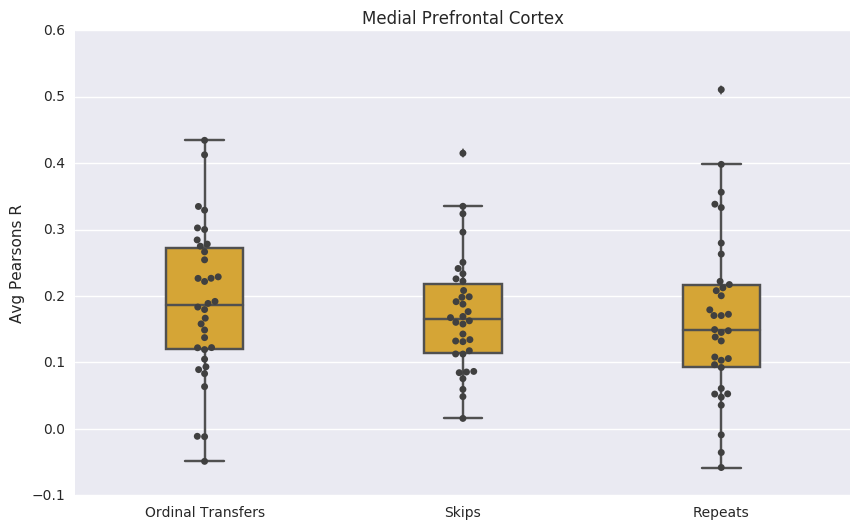

In [14]:
for key in mPFC_avg_df:
    print "Mean {0}: ".format(key), np.mean(mPFC_avg_df['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(mPFC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(mPFC_avg_df['{0}'.format(key)])
    print "--------"    
N = 3
conditions = ['Ordinal Transfers', 'Skips', 'Repeats']
mpfc_allsubjs = [mPFC_avg_df['ots'], mPFC_avg_df['skips'], mPFC_avg_df['repeats']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#efb01c", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("Medial Prefrontal Cortex")
plt.show()

### Ordinal Transfers

Mean pos4:  0.317522
STD pos4:  0.230569
Shapiro's Test of Normality: (0.9650902152061462, 0.3230695128440857)
--------
Mean pos5:  0.172728
STD pos5:  0.201571
Shapiro's Test of Normality: (0.9849638342857361, 0.9030513167381287)
--------
Mean pos2:  0.147612
STD pos2:  0.190883
Shapiro's Test of Normality: (0.9693384170532227, 0.42533090710639954)
--------
Mean pos3:  0.151602
STD pos3:  0.222639
Shapiro's Test of Normality: (0.9570042490959167, 0.1856556534767151)
--------


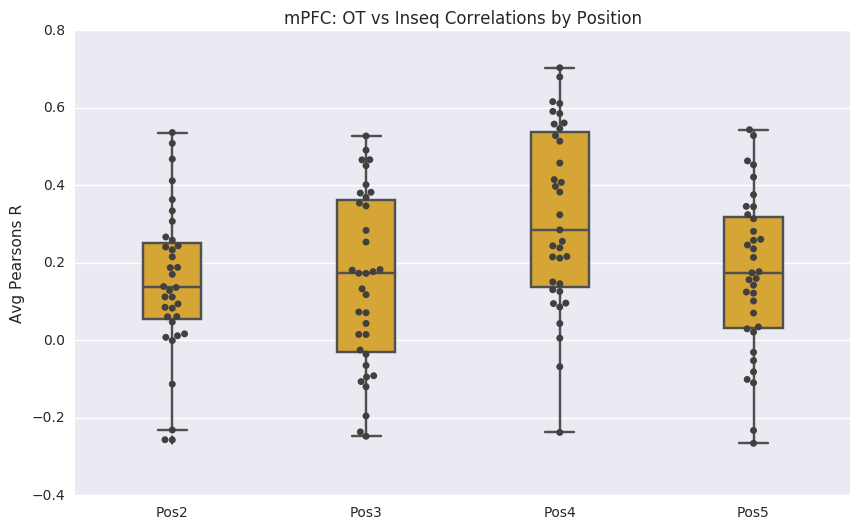

In [15]:
ot_mpfc_corrs = {'pos2':[], 'pos3':[], 'pos4':[], 'pos5':[]}

for i, sub in enumerate(sids):
    for x in ['2','3','4','5']:
        mpfc_corr = eval('stats.pearsonr(ot_df["mpfc_pos{0}"][{1}],inseq_df["mpfc_pos{0}"][{1}])[0]'.format(x,i))
        ot_mpfc_corrs["pos{0}".format(x)].append(mpfc_corr)
ot_mpfc_corrs_df = pd.DataFrame(ot_mpfc_corrs)
corr_table = []
for key in ot_mpfc_corrs:
    print "Mean {0}: ".format(key), np.mean(ot_mpfc_corrs['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(ot_mpfc_corrs['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(ot_mpfc_corrs['{0}'.format(key)])
    print "--------"
N = 4
conditions = ['Pos2', 'Pos3', 'Pos4', 'Pos5']
mpfc_allsubjs = [ot_mpfc_corrs['pos2'], ot_mpfc_corrs['pos3'], 
                 ot_mpfc_corrs['pos4'], ot_mpfc_corrs['pos5']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#efb01c", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("mPFC: OT vs Inseq Correlations by Position")
plt.show()

### Skips

Mean pos4:  0.309912
STD pos4:  0.217803
Shapiro's Test of Normality: (0.9582638740539551, 0.2027185708284378)
--------
Mean pos5:  0.108652
STD pos5:  0.119462
Shapiro's Test of Normality: (0.9623174071311951, 0.2680639922618866)
--------
Mean pos2:  0.164583
STD pos2:  0.200449
Shapiro's Test of Normality: (0.9522911906242371, 0.13325358927249908)
--------
Mean pos3:  0.199038
STD pos3:  0.21803
Shapiro's Test of Normality: (0.9834911823272705, 0.8652242422103882)
--------


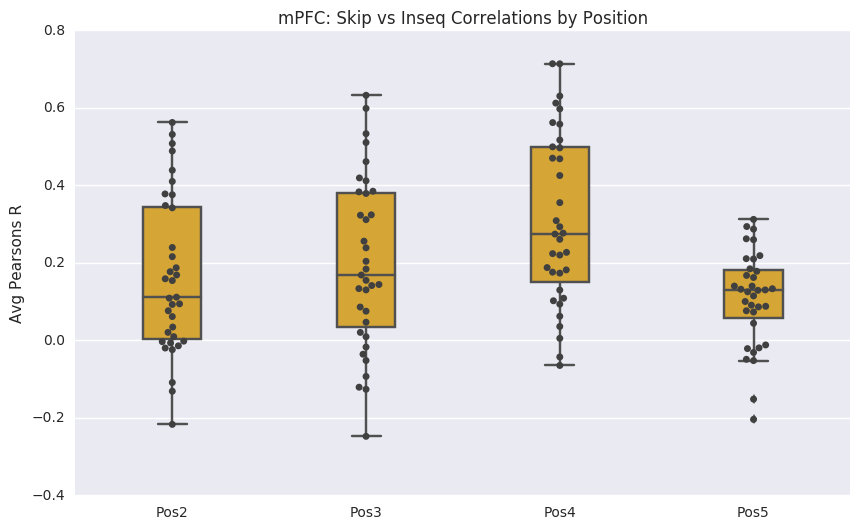

In [16]:
skip_mpfc_corrs = {'pos2':[], 'pos3':[], 'pos4':[], 'pos5':[]}

for i, sub in enumerate(sids):
    for x in ['2','3','4','5']:
        mpfc_corr=eval('stats.pearsonr(skip_df["mpfc_pos{0}"][{1}],inseq_df["mpfc_pos{0}"][{1}])[0]'.format(x,i))
        skip_mpfc_corrs["pos{0}".format(x)].append(mpfc_corr)
skip_mpfc_corrs_df = pd.DataFrame(skip_mpfc_corrs)
corr_table = []
for key in skip_mpfc_corrs:
    print "Mean {0}: ".format(key), np.mean(skip_mpfc_corrs['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(skip_mpfc_corrs['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(skip_mpfc_corrs['{0}'.format(key)])
    print "--------"
N = 4
conditions = ['Pos2', 'Pos3', 'Pos4', 'Pos5']
mpfc_skip_allsubjs = [skip_mpfc_corrs['pos2'], skip_mpfc_corrs['pos3'], 
                    skip_mpfc_corrs['pos4'], skip_mpfc_corrs['pos5']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_skip_allsubjs, color = "#efb01c", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_skip_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("mPFC: Skip vs Inseq Correlations by Position")
plt.show()

### Repeats

Mean pos6:  0.129191
STD pos6:  0.212546
Shapiro's Test of Normality: (0.956017017364502, 0.1732483208179474)
--------
Mean pos4:  0.267911
STD pos4:  0.236167
Shapiro's Test of Normality: (0.9673412442207336, 0.3744850158691406)
--------
Mean pos5:  0.177248
STD pos5:  0.194474
Shapiro's Test of Normality: (0.9276556372642517, 0.023841137066483498)
--------
Mean pos3:  0.160128
STD pos3:  0.170646
Shapiro's Test of Normality: (0.9750089049339294, 0.5942874550819397)
--------


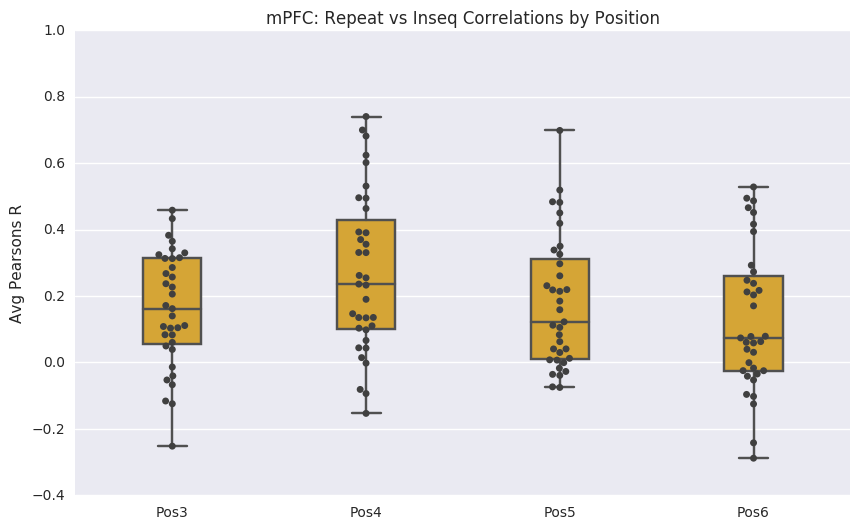

In [17]:
repeat_mpfc_corrs = {'pos3':[], 'pos4':[], 'pos5':[], 'pos6':[]}

for i, sub in enumerate(sids):
    for x in ['3','4','5','6']:
        mpfc_corr=eval('stats.pearsonr(repeat_df["mpfc_pos{0}"][{1}],inseq_df["mpfc_pos{0}"][{1}])[0]'.format(x,i))
        repeat_mpfc_corrs["pos{0}".format(x)].append(mpfc_corr)
repeat_mpfc_corrs_df = pd.DataFrame(repeat_mpfc_corrs)
corr_table = []
for key in repeat_mpfc_corrs:
    print "Mean {0}: ".format(key), np.mean(repeat_mpfc_corrs['{0}'.format(key)])
    print "STD {0}: ".format(key), np.std(repeat_mpfc_corrs['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(repeat_mpfc_corrs['{0}'.format(key)])
    print "--------"
N = 4
conditions = ['Pos3', 'Pos4', 'Pos5', 'Pos6']
mpfc_repeat_allsubjs = [repeat_mpfc_corrs['pos3'], repeat_mpfc_corrs['pos4'], 
                       repeat_mpfc_corrs['pos5'], repeat_mpfc_corrs['pos6']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_repeat_allsubjs, color = "#efb01c", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_repeat_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("mPFC: Repeat vs Inseq Correlations by Position")
plt.show()

#sns.heatmap(corr_table, annot=True)